In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/playground-series-s3e23/sample_submission.csv
/kaggle/input/playground-series-s3e23/train.csv
/kaggle/input/playground-series-s3e23/test.csv


In [2]:
traindata=pd.read_csv('/kaggle/input/playground-series-s3e23/train.csv')
testdata=pd.read_csv('/kaggle/input/playground-series-s3e23/test.csv')
subdata=pd.read_csv('/kaggle/input/playground-series-s3e23/sample_submission.csv')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sys

In [4]:
traindata

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,...,7,0,1,0,11.0,8.0,16.0,12.0,3.0,False
101759,101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,...,23,0,2,0,18.0,20.0,67.0,40.0,9.0,False
101760,101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,...,20,0,4,0,10.0,8.0,51.0,28.0,1.0,False
101761,101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,...,7,0,1,0,11.0,14.0,24.0,19.0,3.0,False


In [5]:
traindata.shape

(101763, 23)

In [6]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [7]:
traindata.describe()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,...,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000,101763.000000
mean,50881.000000,37.347160,5.492684,2.845022,3.498826,96.655995,538.280956,0.111634,13.681881,27.573007,...,1141.357982,22.802453,1.773945,3.979865,0.196604,11.896131,15.596671,57.628116,39.249698,9.839549
std,29376.592059,54.600401,7.900855,4.631262,5.534541,171.147191,1270.791601,0.100096,14.121306,22.856742,...,9862.795472,38.541010,5.902412,6.382358,0.998906,6.749549,18.064261,104.537660,71.692309,14.412769
min,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,25440.500000,13.000000,2.000000,1.000000,1.000000,25.000000,97.670000,0.050000,5.600000,15.560000,...,31.380000,7.000000,0.000000,1.000000,0.000000,8.000000,7.000000,15.000000,10.000000,3.000000
50%,50881.000000,22.000000,3.000000,1.000000,2.000000,51.000000,232.790000,0.090000,9.820000,23.360000,...,125.400000,14.000000,0.000000,2.000000,0.000000,11.000000,12.000000,30.000000,20.000000,5.000000
75%,76321.500000,42.000000,6.000000,3.000000,4.000000,111.000000,560.250000,0.150000,18.000000,34.340000,...,565.920000,26.000000,1.000000,5.000000,0.000000,16.000000,20.000000,66.000000,45.000000,11.000000
max,101762.000000,3442.000000,404.000000,165.000000,402.000000,8441.000000,80843.080000,1.000000,418.200000,569.780000,...,935923.390000,2824.000000,344.000000,219.000000,43.000000,410.000000,1026.000000,5420.000000,3021.000000,503.000000


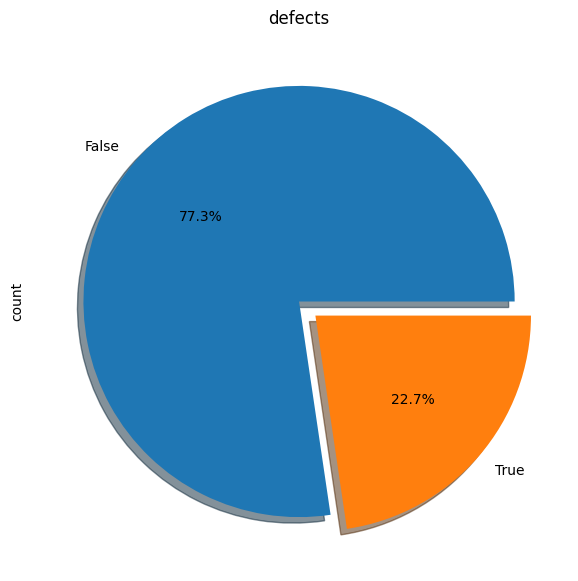

In [8]:
fig, ax = plt.subplots(figsize=(7, 7))
traindata['defects'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', shadow=True)
ax.set_title('defects')
plt.show()

In [9]:
target=traindata['defects']

In [10]:
target=target.map({False:0, True: 1})
target

0         0
1         0
2         0
3         1
4         0
         ..
101758    0
101759    0
101760    0
101761    0
101762    0
Name: defects, Length: 101763, dtype: int64

In [11]:
traindata=traindata.drop('defects',axis=1)

In [12]:
traindata

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,...,45.09,7,0,1,0,11.0,8.0,16.0,12.0,3.0
101759,101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,...,626.01,23,0,2,0,18.0,20.0,67.0,40.0,9.0
101760,101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,...,327.43,20,0,4,0,10.0,8.0,51.0,28.0,1.0
101761,101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,...,85.22,7,0,1,0,11.0,14.0,24.0,19.0,3.0


In [13]:
traindata.columns

Index(['id', 'loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e',
       'b', 't', 'lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment',
       'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'],
      dtype='object')

In [14]:
features=['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'i', 'e',
       'b', 't', 'lOCode', 'lOBlank', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']

In [15]:
xtrain=traindata[features]
xtrain

,loc,v(g),ev(g),iv(g),n,i,e,b,t,lOCode,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,22.0,3.0,1.0,2.0,60.0,14.25,5448.79,0.09,302.71,17,1,16.0,9.0,38.0,22.0,5.0
1,14.0,2.0,1.0,2.0,32.0,21.11,936.71,0.05,52.04,11,1,11.0,11.0,18.0,14.0,3.0
2,11.0,2.0,1.0,2.0,45.0,22.76,1754.01,0.07,97.45,8,1,12.0,11.0,28.0,17.0,3.0
3,8.0,1.0,1.0,1.0,23.0,17.86,473.66,0.03,26.31,4,2,8.0,6.0,16.0,7.0,1.0
4,11.0,2.0,1.0,2.0,17.0,12.44,365.67,0.02,20.31,7,2,7.0,6.0,10.0,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,10.0,2.0,1.0,1.0,28.0,18.63,811.70,0.04,45.09,7,1,11.0,8.0,16.0,12.0,3.0
101759,27.0,5.0,4.0,1.0,107.0,34.17,11268.27,0.19,626.01,23,2,18.0,20.0,67.0,40.0,9.0
101760,26.0,1.0,1.0,1.0,83.0,12.56,5893.69,0.12,327.43,20,4,10.0,8.0,51.0,28.0,1.0
101761,10.0,2.0,1.0,2.0,43.0,29.53,1534.04,0.06,85.22,7,1,11.0,14.0,24.0,19.0,3.0


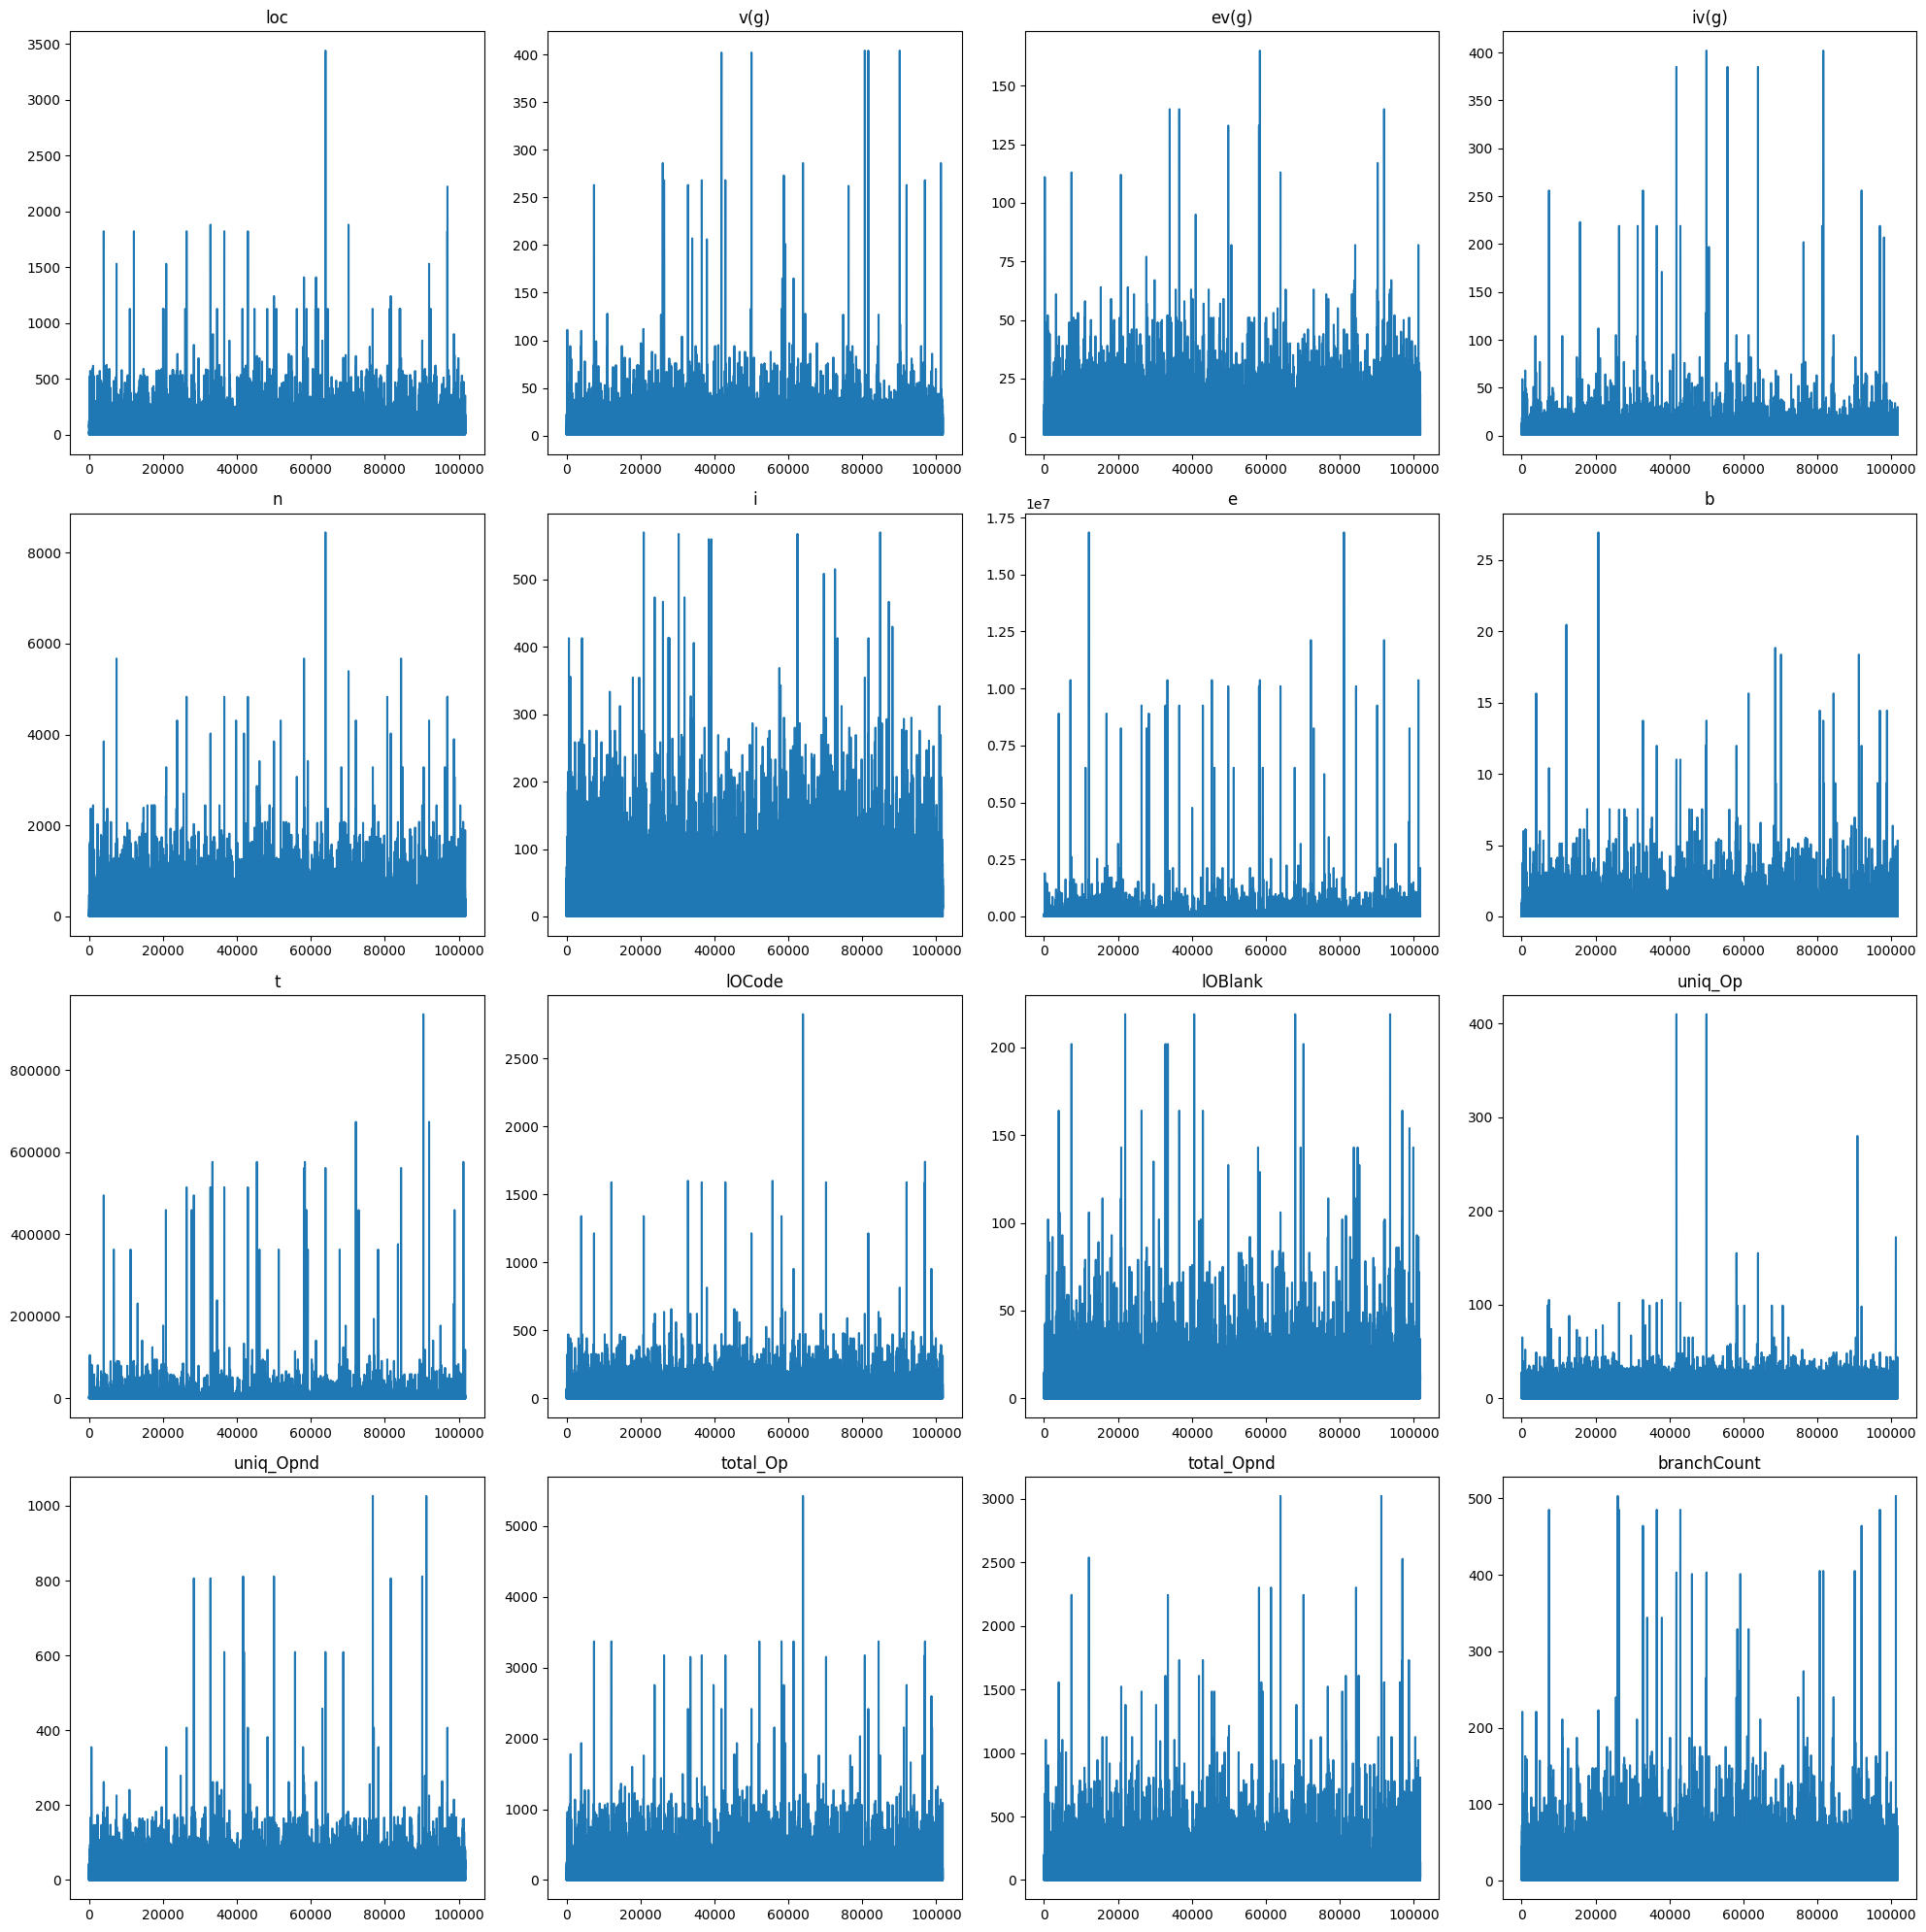

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(xtrain.columns):
    ax = axes[i]
    ax.plot(xtrain.index, xtrain[column])
    ax.set_title(column)

plt.tight_layout()
plt.show()

In [17]:
from sklearn.model_selection import (
    train_test_split,
    KFold,
    StratifiedKFold,
    cross_val_score,
    cross_validate,
    cross_val_predict,
    GridSearchCV,
    RandomizedSearchCV,
    TimeSeriesSplit,
    GroupKFold
)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [18]:
xtrain.isnull().sum()

loc            0
v(g)           0
ev(g)          0
iv(g)          0
n              0
i              0
e              0
b              0
t              0
lOCode         0
lOBlank        0
uniq_Op        0
uniq_Opnd      0
total_Op       0
total_Opnd     0
branchCount    0
dtype: int64

In [19]:
xtrain, xval, ytrain, yval =train_test_split(xtrain, target, test_size=0.3, random_state=1)

In [20]:
print(xtrain.shape, xval.shape, ytrain.shape, yval.shape)

(71234, 16) (30529, 16) (71234,) (30529,)


In [21]:
model1 = LogisticRegression()
model2 = DecisionTreeClassifier(max_depth=3, random_state=1)
model3 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model4 = GradientBoostingClassifier()
model5 = LinearSVC()
model6 = XGBClassifier()
model7 = LGBMClassifier()

In [22]:
models=[model1, model2, model3, model4,model5,model6,model7]
print(models)

[LogisticRegression(), DecisionTreeClassifier(max_depth=3, random_state=1), RandomForestClassifier(max_depth=5, random_state=42), GradientBoostingClassifier(), LinearSVC(), XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...), LGBMClassifier()]


In [23]:
yval.shape

(30529,)

In [24]:
for model in models:
    model.fit(xtrain,ytrain)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[LightGBM] [Info] Number of positive: 16080, number of negative: 55154
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013861 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2862
[LightGBM] [Info] Number of data points in the train set: 71234, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.225735 -> initscore=-1.232553
[LightGBM] [Info] Start training from score -1.232553


Model 1 AUC: 0.6088


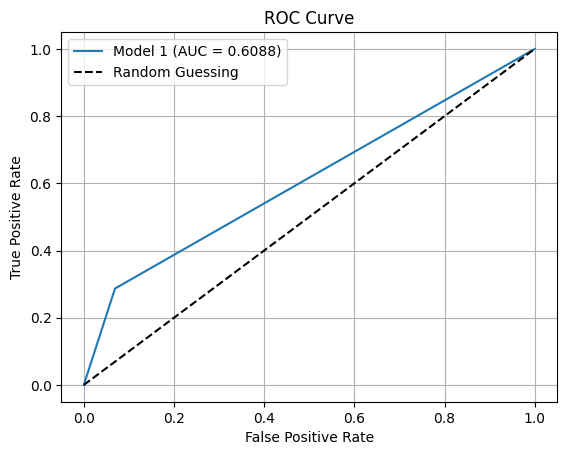

Model 2 AUC: 0.6836


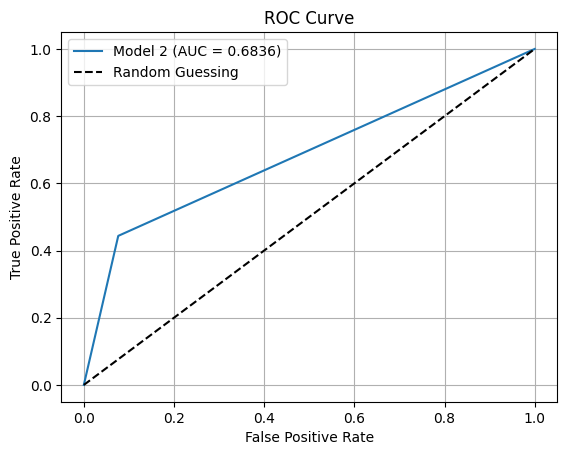

Model 3 AUC: 0.6617


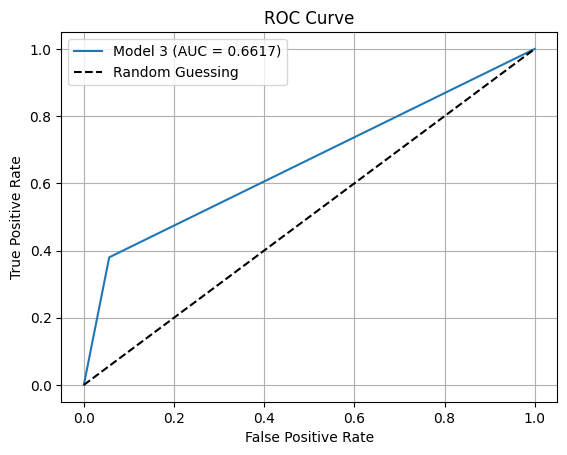

Model 4 AUC: 0.6676


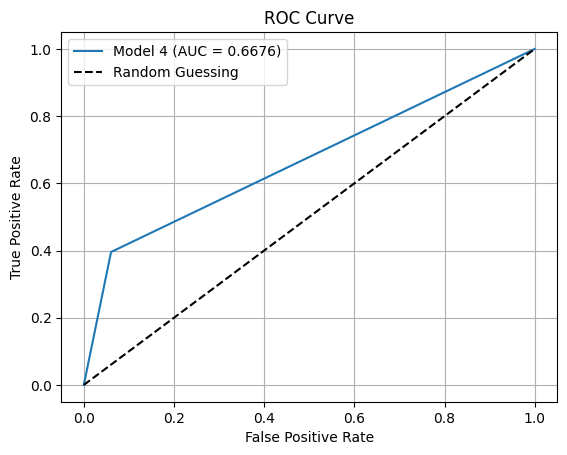

Model 5 AUC: 0.5247


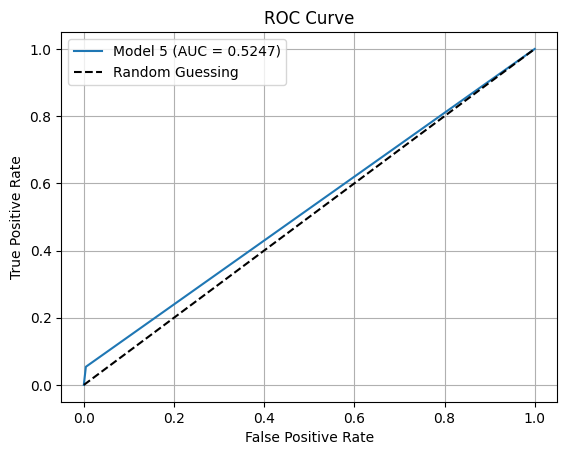

Model 6 AUC: 0.6581


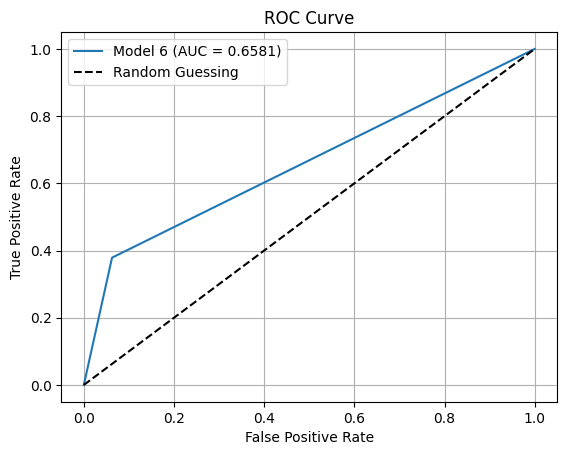

Model 7 AUC: 0.6649


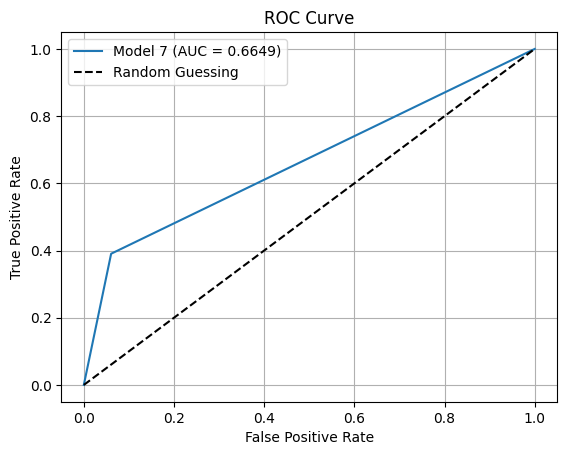

In [25]:
auc_scores = {}

for i, model in enumerate(models):
    y_pred_proba = model.predict(xval)
    auc_score = roc_auc_score(yval, y_pred_proba)
    fpr, tpr, _ = roc_curve(yval, y_pred_proba)
    auc_scores[f'Model {i+1}'] = auc_score
    print(f'Model {i+1} AUC: {auc_score:.4f}')
    plt.plot(fpr, tpr, label=f'Model {i+1} (AUC = {auc_score:.4f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

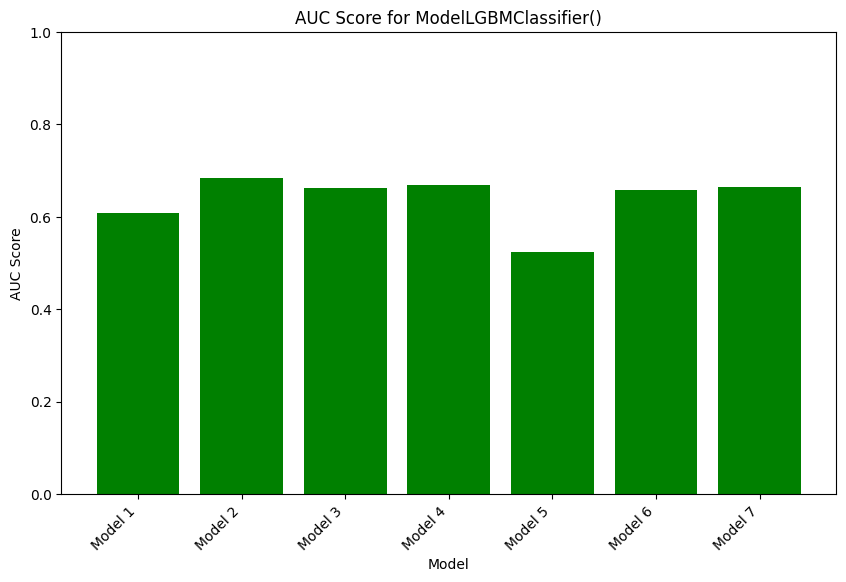

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(auc_scores.keys(), auc_scores.values(), color='green')
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.title(f'AUC Score for Model{model}')
plt.ylim(0, 1.0)  
plt.xticks(rotation=45, ha='right') 
plt.show()

As we all know higher roc auc will shows a better model performance. we will start predicting test results as with higher to lower of roc auc values.

In [27]:
testdata

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67837,169600,41.0,1.0,1.0,1.0,125.0,656.55,0.07,14.00,47.61,...,479.35,31,0,7,0,14.0,27.0,71.0,54.0,1.0
67838,169601,20.0,3.0,1.0,3.0,38.0,161.42,0.15,6.75,23.28,...,58.94,15,0,3,0,9.0,10.0,23.0,15.0,5.0
67839,169602,24.0,2.0,1.0,2.0,52.0,240.00,0.11,9.00,26.67,...,120.00,18,0,4,0,16.0,16.0,36.0,18.0,3.0
67840,169603,18.0,2.0,1.0,1.0,49.0,216.64,0.11,9.33,24.02,...,117.68,12,0,2,0,8.0,12.0,29.0,22.0,3.0


In [28]:
xtest=testdata[features]
xtest

,loc,v(g),ev(g),iv(g),n,i,e,b,t,lOCode,lOBlank,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,33.0,5.0,1.0,4.0,144.0,30.05,22636.74,0.27,1257.60,30,3,21.0,23.0,87.0,57.0,9.0
1,27.0,8.0,8.0,2.0,125.0,27.22,14482.46,0.22,804.58,23,2,18.0,19.0,70.0,49.0,15.0
2,130.0,11.0,7.0,10.0,545.0,66.17,116160.08,1.28,6453.34,99,17,26.0,53.0,333.0,244.0,21.0
3,65.0,7.0,1.0,7.0,156.0,49.89,16135.47,0.29,896.42,45,10,15.0,26.0,88.0,60.0,13.0
4,22.0,3.0,1.0,3.0,52.0,26.70,2624.49,0.08,145.80,16,4,12.0,15.0,30.0,24.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67837,41.0,1.0,1.0,1.0,125.0,47.61,8612.32,0.22,479.35,31,7,14.0,27.0,71.0,54.0,1.0
67838,20.0,3.0,1.0,3.0,38.0,23.28,1060.92,0.05,58.94,15,3,9.0,10.0,23.0,15.0,5.0
67839,24.0,2.0,1.0,2.0,52.0,26.67,2160.00,0.08,120.00,18,4,16.0,16.0,36.0,18.0,3.0
67840,18.0,2.0,1.0,1.0,49.0,24.02,2118.30,0.08,117.68,12,2,8.0,12.0,29.0,22.0,3.0


In [29]:
pred2=model2.predict(xtest)
pred2

array([0, 0, 1, ..., 0, 0, 1])

In [30]:
result2=pd.DataFrame ({'id' : testdata['id'], 'defect':pred2})
result2

,id,defect
0,101763,0
1,101764,0
2,101765,1
3,101766,1
4,101767,0
...,...,...
67837,169600,0
67838,169601,0
67839,169602,0
67840,169603,0


In [31]:
result2.to_csv('submission2.csv', index=False)

In [32]:
subdata

,id,defects
0,101763,0.5
1,101764,0.5
2,101765,0.5
3,101766,0.5
4,101767,0.5
...,...,...
67837,169600,0.5
67838,169601,0.5
67839,169602,0.5
67840,169603,0.5
